#Clase 24 de septiembre
Perceptrón
Lizbeth Contreras Figueroa

In [2]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

#Se leen los datos del archivo "regLib4.csv"

In [50]:
X = pd.read_csv("regLin4.csv")
X.head()

,X,y
0,71.130300,0
1,36.872465,0
2,56.508402,0
3,78.120147,0
4,65.575073,0


Se observa que en la columna de "y" solamanete aparecen ceros, por tanto se piden los últimos valores para verificar.

In [51]:
X.tail()

,X,y
1024,92.943540,0
1025,85.844461,0
1026,33.099479,0
1027,82.177929,0
1028,15.361435,1


Se divide la serie en entrenamiento y prueba

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X[['X']], X['y'], train_size = 0.75)
print len(X_train), len(X_test)

771 258


Se definen las funciones "salida" y "entrena"

In [53]:
def salida(w0,W,X1):
    V_X=w0
    for k in range(len(W)):
        V_X = V_X + (W[k] * X1[k])
        
    if V_X>=0:
        V_X=1
    else:
        V_X=0
    return V_X

In [54]:
def entrena(w0, W, X, y, nu, lamb):
    suma_err = 0
    y_est =[]
    for i in range(len(X)):
        X1 = X.iloc[i]
        sal = salida(w0, W, X1)
        error = y.iloc[i] - sal
        y_est.insert(i,sal)
        w0 = w0 + (nu * error)
        for j in range(len(X1)):
            W[j] = W[j] + (nu * error * X.iloc[i][j]) - (lamb * W[j])
    return w0, W, y_est

In [55]:
w0 = float(np.random.randint(-10, 10, 1))
W = list(np.random.randint(-10, 10, 1))
nu = 0.01
lamb = 0.0001

In [56]:
res = entrena(w0, W, X_train, y_train, nu, lamb)

In [57]:
X_scaler = preprocessing.StandardScaler().fit(X_train)

In [58]:
Xscaler = X_scaler.transform(X_train)

In [59]:
Xscaler = pd.DataFrame(Xscaler)

In [60]:
w0 = float(np.random.randint(-2, 2, 1))
W = list(np.random.randint(-2, 2, 1))
nu = 0.01
lamb = 0.0001

In [61]:
res_trans=entrena(w0, W, Xscaler, y_train, nu, lamb)

In [62]:
w0 = res_trans[0]
w0

-1.1600000000000001

In [63]:
w1= res_trans[1][0]
w1

-1.7557848392044282

In [64]:
X1 = (-w0/w1)
X1

-0.66067320670430962

In [65]:
y1 = np.arange(0.0,1.1,0.1)
X = [X1]*11
X

[-0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962,
 -0.66067320670430962]

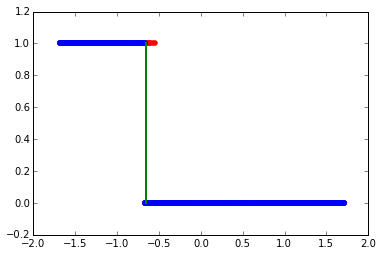

In [66]:
plt.scatter(Xscaler[0], y_train)
plt.scatter(Xscaler[0], res_trans[2], color='red')
plt.scatter(Xscaler[0], y_train, color='blue')
plt.plot(X, y1, linewidth = 2, color='green')
plt.show()

#AND

Se generan valores aleatorios (0, 1) para dos variables (X1, X2) y se grafica

In [67]:
Xs = pd.DataFrame(np.random.randint(0, 2, 1000), columns=['x1'])
Xs['x2'] = np.random.randint(0, 2, 1000)
Xs.head()

,x1,x2
0,0,0
1,0,1
2,0,1
3,1,1
4,0,0


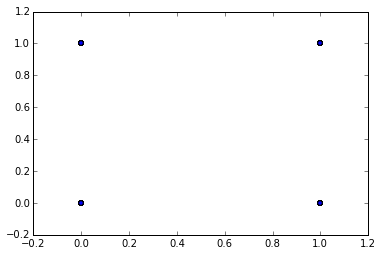

In [68]:
plt.scatter(Xs['x1'], Xs['x2'])

Los valores de "Y" se obtienen con base en lo siguiente:
   X1   X2   Y   
   0    0    0    
   0    1    0
   1    0    0
   1    1    1

In [76]:
Y = []
for i in range(len(Xs)):
    if Xs.iloc[i][0] == 0 and Xs.iloc[i][1] == 0:
        Y.insert(i, 0)
    elif Xs.iloc[i][0] == 0 and Xs.iloc[i][1] == 1:
        Y.insert(i, 0)
    elif Xs.iloc[i][0] == 1 and Xs.iloc[i][1] == 0:
        Y.insert(i, 0)
    else:
        Y.insert(i, 1)
Xs['y'] = Y
Xs.head()

,x1,x2,y
0,0,0,0
1,0,1,0
2,0,1,0
3,1,1,1
4,0,0,0


Se puede verificar que si se generaron correctamente y se procede a obtener la regresión

In [77]:
w0 = float(np.random.randint(0, 2, 1))
W = list(np.random.randint(-2, 3, 2))
nu = 0.01
lamb = 0.001

In [78]:
def salida(w0, W, X1):
    V_X = w0
    for k in range(len(W)):
        V_X = V_X + (W[k] * X1[k])
    if V_X > 0:
        V_X = 1.0
    else:
        V_X = 0.0
    return V_X

In [80]:
def entrena(w0, W, X, Y, nu, lam):
    suma_err = 0
    y_est = []
    for i in range(len(X)):
        X1 = X.iloc[i]
        sal = salida(w0, W, X1)
        error = Y.iloc[i] - sal
        w0 = w0 + (nu * error)
        for j in range(len(X1)):
            W[j] = W[j] + (nu * error * X.iloc[i][j]) - (lam * W[j])
    return w0, W

In [86]:
res = entrena(w0, W, Xs[['x1', 'x2']], Xs['y'], nu, lam)
res

(-0.029999999999999999, [0.0094639529001093996, 0.021028026537481762])

In [87]:
x1_0 = -res[0] / res[1][0]
x1_1 = (-res[0] - res[1][1]) / res[1][0]

In [91]:
x2_0 = -res[0] / res[1][1]
x2_1 = (-res[0] - res[1][0]) / res[1][1]

In [92]:
Xs_0 = pd.DataFrame([0, 1], columns=['x1_0'])
Xs_0['x2_0'] =[x2_0, x2_1]
Xs_0.head()

,x1_0,x2_0
0,0,1.426667
1,1,0.976604


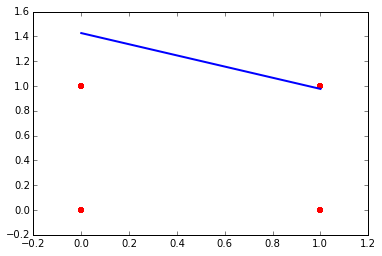

In [93]:
plt.scatter(Xs['x1'], Xs['x2'], color = 'red')
plt.plot(Xs_0['x1_0'], Xs_0['x2_0'], color = 'blue', linewidth = 2)
plt.show()